In [1]:
import cv2
import numpy as np

In [2]:
def find_largest_contour(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return max(contours, key=cv2.contourArea)

def standardize_image(image_path, target_width, target_height):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Find the largest contour (assuming it's the shape)
    shape_contour = find_largest_contour(image)

    # Get bounding rect of the contour
    x, y, w, h = cv2.boundingRect(shape_contour)

    # Calculate the center of the shape
    center = (x + w // 2, y + h // 2)

    # Determine the angle for rotation
    _, (width, height), angle = cv2.minAreaRect(shape_contour)
    if width < height:
        angle = 90 - angle
    else:
        angle = -angle

    # Rotate the image
    M = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    # Resize the image to fit the target size
    resized = cv2.resize(rotated, (target_width, target_height))

    return resized

def display_image_in_notebook(image):
    pil_img = PILImage.fromarray(image)
    buf = io.BytesIO()
    pil_img.save(buf, format='PNG')
    display(Image(data=buf.getvalue()))

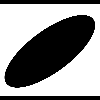

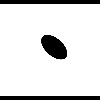

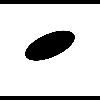

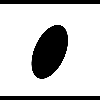

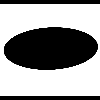

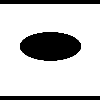

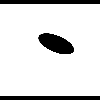

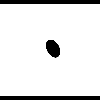

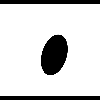

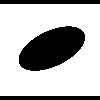

In [3]:
TARGET_WIDTH = 100  # Example width
TARGET_HEIGHT = 100  # Example height

# Load all PNG images
image_paths = glob.glob('*.png')

# Process each image
standardized_images = [standardize_image(path, TARGET_WIDTH, TARGET_HEIGHT) for path in image_paths]

for img in standardized_images:
    display_image_in_notebook(img)